In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
data = pd.read_csv("ds_salaries.csv")
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,sam
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,1
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,1
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,1
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,1
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,1


In [3]:
data.shape

(607, 13)

In [4]:
total = data.isnull().sum().sort_values(ascending=False)
total

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
sam                   0
dtype: int64

In [5]:
data["job_title"].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [6]:
print(data.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'sam'],
      dtype='object')


jumlah title pekerjaan

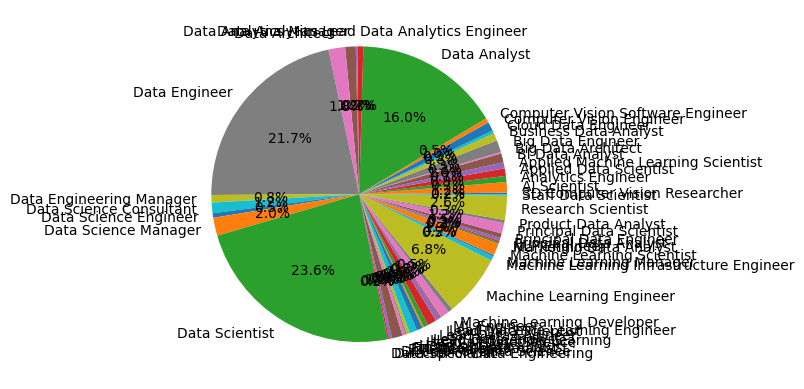

In [7]:
test1 = data.groupby(by=["job_title"]).sam.sum().reset_index()
nama_pekerjaan = data["job_title"].sort_values(ascending=True)


fgr, ax = plt.subplots()

ax.pie(test1["sam"], labels=nama_pekerjaan.unique(), autopct='%1.1f%%')
plt.show()

In [8]:
data_penghasilan = data.groupby("job_title").sum()
data_penghasilan = data_penghasilan["salary_in_usd"]
data_penghasilan

job_title
3D Computer Vision Researcher                   5409
AI Scientist                                  462949
Analytics Engineer                            700000
Applied Data Scientist                        878275
Applied Machine Learning Scientist            568275
BI Data Analyst                               448531
Big Data Architect                             99703
Big Data Engineer                             415792
Business Data Analyst                         383456
Cloud Data Engineer                           249294
Computer Vision Engineer                      266516
Computer Vision Software Engineer             315746
Data Analyst                                 9010627
Data Analytics Engineer                       259197
Data Analytics Lead                           405000
Data Analytics Manager                        889940
Data Architect                               1956613
Data Engineer                               14879700
Data Engineering Manager            

In [9]:
rata_rata_data_penghasilan = data_penghasilan.div(len(data_penghasilan))

C:\Users\Nur Hary\AppData\Local\Temp\ipykernel_22404\999192748.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)


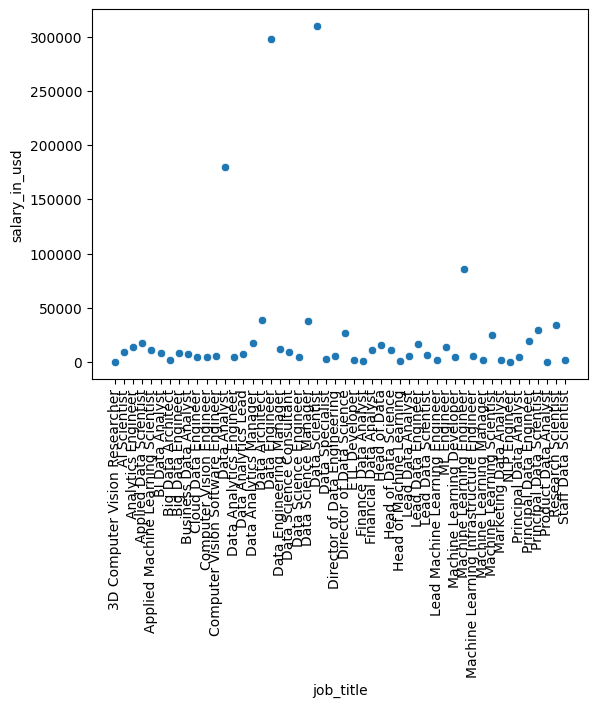

In [10]:
plot1 = sns.scatterplot(rata_rata_data_penghasilan)
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plt.show()

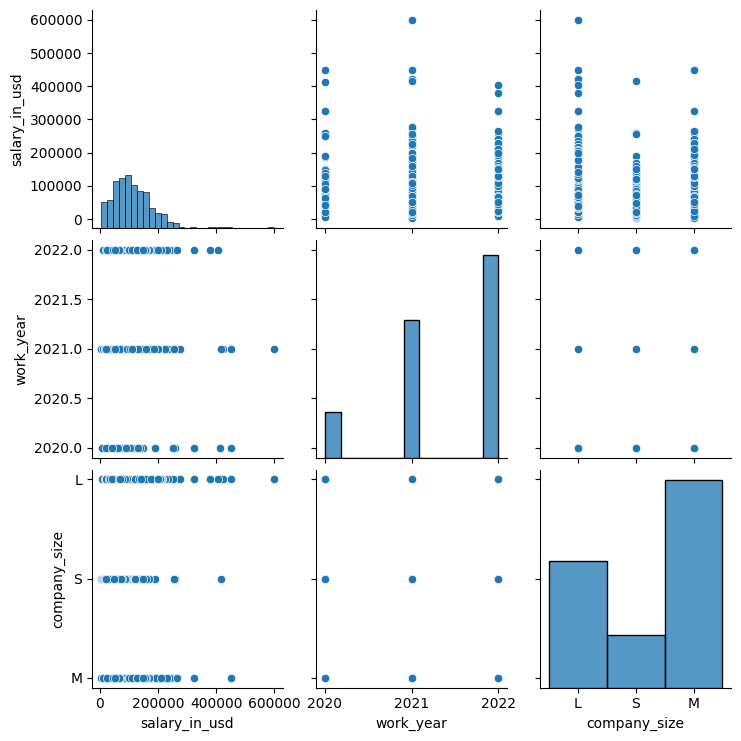

In [11]:
sns.pairplot(data, vars = ["salary_in_usd", "work_year", "company_size"])

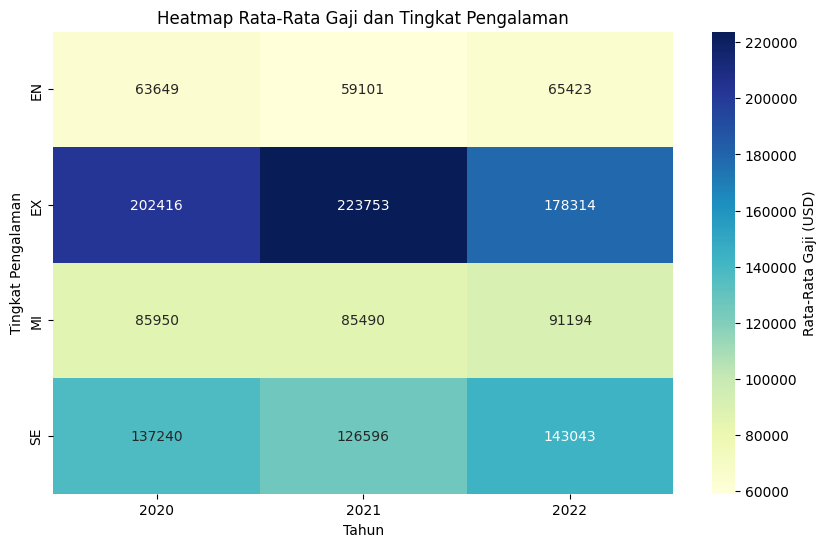

In [12]:
heatmap_data = data.pivot_table(values='salary_in_usd', 
                                index='experience_level', 
                                columns='work_year', 
                                aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Rata-Rata Gaji (USD)'})
plt.title("Heatmap Rata-Rata Gaji dan Tingkat Pengalaman")
plt.xlabel("Tahun")
plt.ylabel("Tingkat Pengalaman")
plt.show()
